In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection/fraudTest.csv
/kaggle/input/fraud-detection/fraudTrain.csv


In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
import warnings

warnings.filterwarnings('ignore')

In [3]:
# Load the dataset

train_data = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')

test_data = pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
# Check for null values

train_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
train_data.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [8]:
# Combining both training & testing data

data = pd.concat([train_data,test_data])

In [9]:
data.shape

(1852394, 23)

In [10]:
# Let us check how each feature is correlated with the target feature



corr_result = {}



for col in data.columns:

    if data[col].dtype != 'object' and col != 'is_fraud':

        corr = data[col].corr(data['is_fraud'])

        corr_result[col] = corr

        

corr_result

{'Unnamed: 0': 0.0005238292595403317,
 'cc_num': -0.001124786409159464,
 'amt': 0.20930784722972315,
 'zip': -0.0021903641196473677,
 'lat': 0.0029039410850806545,
 'long': 0.0010217606338495074,
 'city_pop': 0.00032519441062587527,
 'unix_time': -0.013328789485515179,
 'merch_lat': 0.002777992413389028,
 'merch_long': 0.0009994134859691148}

In [11]:
# Consider only columns necessary for prediction

data.drop(columns=['Unnamed: 0','trans_date_trans_time','first','last','gender','street','job','dob','trans_num'],inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 14 columns):
 #   Column      Dtype  
---  ------      -----  
 0   cc_num      int64  
 1   merchant    object 
 2   category    object 
 3   amt         float64
 4   city        object 
 5   state       object 
 6   zip         int64  
 7   lat         float64
 8   long        float64
 9   city_pop    int64  
 10  unix_time   int64  
 11  merch_lat   float64
 12  merch_long  float64
 13  is_fraud    int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 212.0+ MB


In [13]:
# Check class distribution

data['is_fraud'].value_counts()

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

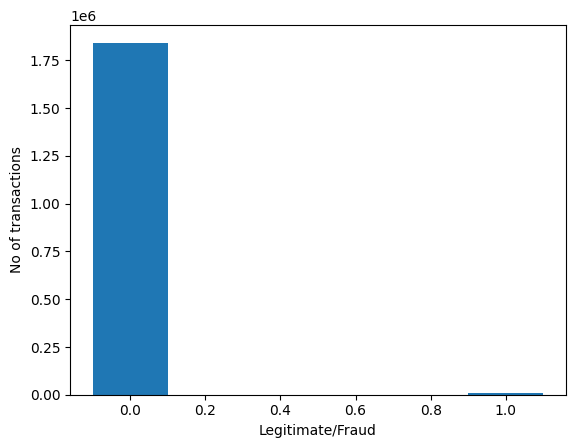

In [14]:
plt.bar(data['is_fraud'].unique(),data['is_fraud'].value_counts(),width = 0.2)

plt.xlabel('Legitimate/Fraud')

plt.ylabel('No of transactions')

plt.show()

In [15]:
# Separate fraud & legitimate transactions

legitimate = data[data['is_fraud'] == 0]

fraud = data[data['is_fraud'] == 1]

In [16]:
# We'll consider only a sample(same number of transactions as fraud) of legitimate transactions

legitimate = legitimate.sample(n = len(fraud))

legitimate.shape

(9651, 14)

In [17]:
# We have same no of legitimate & fraud transactions

fraud.shape

(9651, 14)

In [18]:
# Combine the data

data = pd.concat([legitimate,fraud])

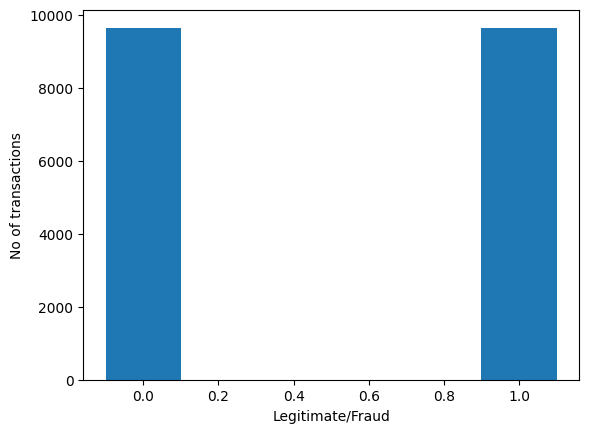

In [19]:
# Check class distribution

plt.bar(data['is_fraud'].unique(),data['is_fraud'].value_counts(),width = 0.2)

plt.xlabel('Legitimate/Fraud')

plt.ylabel('No of transactions')

plt.show()

In [20]:
# Encoding categorical data

le = LabelEncoder()

data['merchant'] = le.fit_transform(data['merchant'])

data['category'] = le.fit_transform(data['category'])

data['city'] = le.fit_transform(data['city'])

data['state'] = le.fit_transform(data['state'])

In [21]:
# All the features are numerical

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19302 entries, 47973 to 517571
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cc_num      19302 non-null  int64  
 1   merchant    19302 non-null  int64  
 2   category    19302 non-null  int64  
 3   amt         19302 non-null  float64
 4   city        19302 non-null  int64  
 5   state       19302 non-null  int64  
 6   zip         19302 non-null  int64  
 7   lat         19302 non-null  float64
 8   long        19302 non-null  float64
 9   city_pop    19302 non-null  int64  
 10  unix_time   19302 non-null  int64  
 11  merch_lat   19302 non-null  float64
 12  merch_long  19302 non-null  float64
 13  is_fraud    19302 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 2.2 MB


In [22]:
# Separating the target feature

x_data = data.iloc[:,:-1].values

y_data = data.iloc[:,-1].values

In [23]:
# Split the data for training and testing

# We shuffle the data before splitting so that the model is trained on both fraud & legitimate transactions

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.3,random_state=42,shuffle=True)

In [24]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [25]:
log_pred = log_reg.predict(x_train)

print("Accuracy score: ",round(accuracy_score(y_train,log_pred),3))

print("Classification report:\n",classification_report(y_train,log_pred))

Accuracy score:  0.5
Classification report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67      6756
           1       0.00      0.00      0.00      6755

    accuracy                           0.50     13511
   macro avg       0.25      0.50      0.33     13511
weighted avg       0.25      0.50      0.33     13511



In [26]:
dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [27]:
dt_pred = dt.predict(x_train)

print("Accuracy score: ",round(accuracy_score(y_train,dt_pred),3))

print("Classification report:\n",classification_report(y_train,dt_pred))

Accuracy score:  1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6756
           1       1.00      1.00      1.00      6755

    accuracy                           1.00     13511
   macro avg       1.00      1.00      1.00     13511
weighted avg       1.00      1.00      1.00     13511



In [28]:
rfc = RandomForestClassifier(n_estimators = 50)

rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [29]:
rfc_pred = rfc.predict(x_train)

print("Accuracy score: ",round(accuracy_score(y_train,rfc_pred),3))

print("Classification report:\n",classification_report(y_train,rfc_pred))

Accuracy score:  1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6756
           1       1.00      1.00      1.00      6755

    accuracy                           1.00     13511
   macro avg       1.00      1.00      1.00     13511
weighted avg       1.00      1.00      1.00     13511



#### Both Decision Tree & Random Forest classifier is overfitting the data. Hence, we'll have to make predictions using Logistic Regression

In [30]:
test_pred = log_reg.predict(x_test)

print("Accuracy score: ",round(accuracy_score(y_test,test_pred),3))

print("Classification report:\n",classification_report(y_test,test_pred))

Accuracy score:  0.5
Classification report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67      2895
           1       0.00      0.00      0.00      2896

    accuracy                           0.50      5791
   macro avg       0.25      0.50      0.33      5791
weighted avg       0.25      0.50      0.33      5791



#### Our model detects fraudulent transactions with an accuracy of 50%